In [2]:
import numpy as np
import tensorflow as tf

## Simple Example

In [3]:
image_input = tf.keras.Input(shape=(32, 32, 3), name='img_input')
ts_input = tf.keras.Input(shape=(None, 10), name='ts_input')

In [4]:
x1 = tf.keras.layers.Conv2D(3, 3)(image_input)
x1 = tf.keras.layers.GlobalMaxPooling2D()(x1)

In [5]:
x2 = tf.keras.layers.Conv1D(3, 3)(ts_input)
x2 = tf.keras.layers.GlobalMaxPooling1D()(x2)

A way to concatenate multiple inputs into one & to be fed them into the model

In [6]:
x = tf.keras.layers.concatenate([x1, x2])

In [7]:
# regression unit
score_output = tf.keras.layers.Dense(1, name='score_output')(x)
# multi-class classifier unit
class_output = tf.keras.layers.Dense(5, activation='softmax', name='class_output')(x)

In [8]:
model = tf.keras.Model(inputs=[image_input, ts_input],
                      outputs=[score_output, class_output])

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img_input (InputLayer)          [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
ts_input (InputLayer)           [(None, None, 10)]   0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 30, 30, 3)    84          img_input[0][0]                  
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, None, 3)      93          ts_input[0][0]                   
______________________________________________________________________________________________

In [10]:
#!brew install graphviz

Updating Homebrew...
==> Auto-updated Homebrew!
Updated 1 tap (homebrew/core).
==> Updated Formulae
bup          frotz        nsd          pdnsrec      phpstan      traefik@1

To reinstall 2.42.2, run `brew reinstall graphviz`


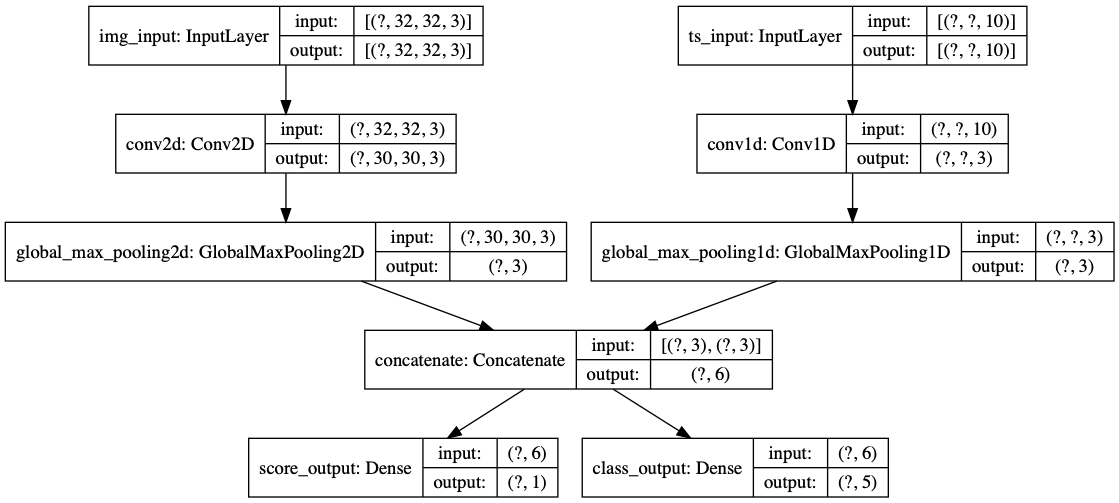

In [11]:
tf.keras.utils.plot_model(model, show_shapes=True)

Specify different losses to different outputs & similarily specify different metrics for different outputs

* MeanSquaredError - Regression Loss
* CategoricalCrossEntropy - MultiClass Classification

In [12]:
model.compile('adam',
              loss=[tf.keras.losses.MeanSquaredError(),
                   tf.keras.losses.CategoricalCrossentropy()],
              metrics=[[tf.keras.metrics.MeanAbsolutePercentageError()],
                       [tf.keras.metrics.CategoricalAccuracy()]]
             )

Generating random input data
* 100 samples of images of size (32, 32, 3)
* 100 samples of timeseries of 10 features each

In [13]:
img_data = np.random.random_sample(size=(100, 32, 32, 3))
ts_data = np.random.random_sample(size=(100, 20, 10))
score_output = np.random.random_sample(size=(100, 1))
class_output = np.random.random_sample(size=(100, 5))

Fitting a model works in a way similar to compiling the model. 
* Input - [img_data, ts_data] - List of inputs
* Output - [score_output, class_output] - List of outputs

In [15]:
history = model.fit([img_data, ts_data], [score_output, class_output], epochs=5, batch_size=32)

Train on 100 samples
Epoch 1/5
100/100 [==============================] - 0s 607us/sample - loss: 5.5633 - score_output_loss: 0.1390 - class_output_loss: 5.3270 - score_output_mean_absolute_percentage_error: 299.9116 - class_output_categorical_accuracy: 0.2300
Epoch 2/5
100/100 [==============================] - 0s 1ms/sample - loss: 5.5543 - score_output_loss: 0.1087 - class_output_loss: 5.5065 - score_output_mean_absolute_percentage_error: 340.7862 - class_output_categorical_accuracy: 0.2300
Epoch 3/5
100/100 [==============================] - 0s 700us/sample - loss: 5.5549 - score_output_loss: 0.1147 - class_output_loss: 5.2552 - score_output_mean_absolute_percentage_error: 366.8787 - class_output_categorical_accuracy: 0.2300
Epoch 4/5
100/100 [==============================] - 0s 675us/sample - loss: 5.5664 - score_output_loss: 0.1142 - class_output_loss: 5.4137 - score_output_mean_absolute_percentage_error: 383.9505 - class_output_categorical_accuracy: 0.2200
Epoch 5/5
100/100 [==